In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from ydata_profiling import ProfileReport
warnings.simplefilter(action='ignore', category=FutureWarning)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
data = pd.read_csv("/Users/emineph/Desktop/ds_salaries.csv")

In [21]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [25]:
profile = ProfileReport(data)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


In [26]:
data.duplicated().sum()

1171

In [27]:
data.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [28]:
data.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [29]:
data.loc[data.job_title=="Applied Scientist", data.columns=="job_title"]="Applied Data Scientist"

In [30]:
data["job_title"]= data["job_title"].replace({"Applied Scientist":"Applied Data Scientist", "ML Engineer":"Machine Learning Engineer"})

In [36]:
data["remote_ratio"]=data["remote_ratio"].replace({0:"On-Site", 100:"Remote work", 50:"Hybrid"})
data.remote_ratio.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3755 entries, 0 to 3754
Series name: remote_ratio
Non-Null Count  Dtype 
--------------  ----- 
3755 non-null   object
dtypes: object(1)
memory usage: 29.5+ KB


In [33]:
data.describe()

,work_year,salary,salary_in_usd
count,3755.000000,3.755000e+03,3755.000000
mean,2022.373635,1.906956e+05,137570.389880
std,0.691448,6.716765e+05,63055.625278
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.380000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


In [38]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

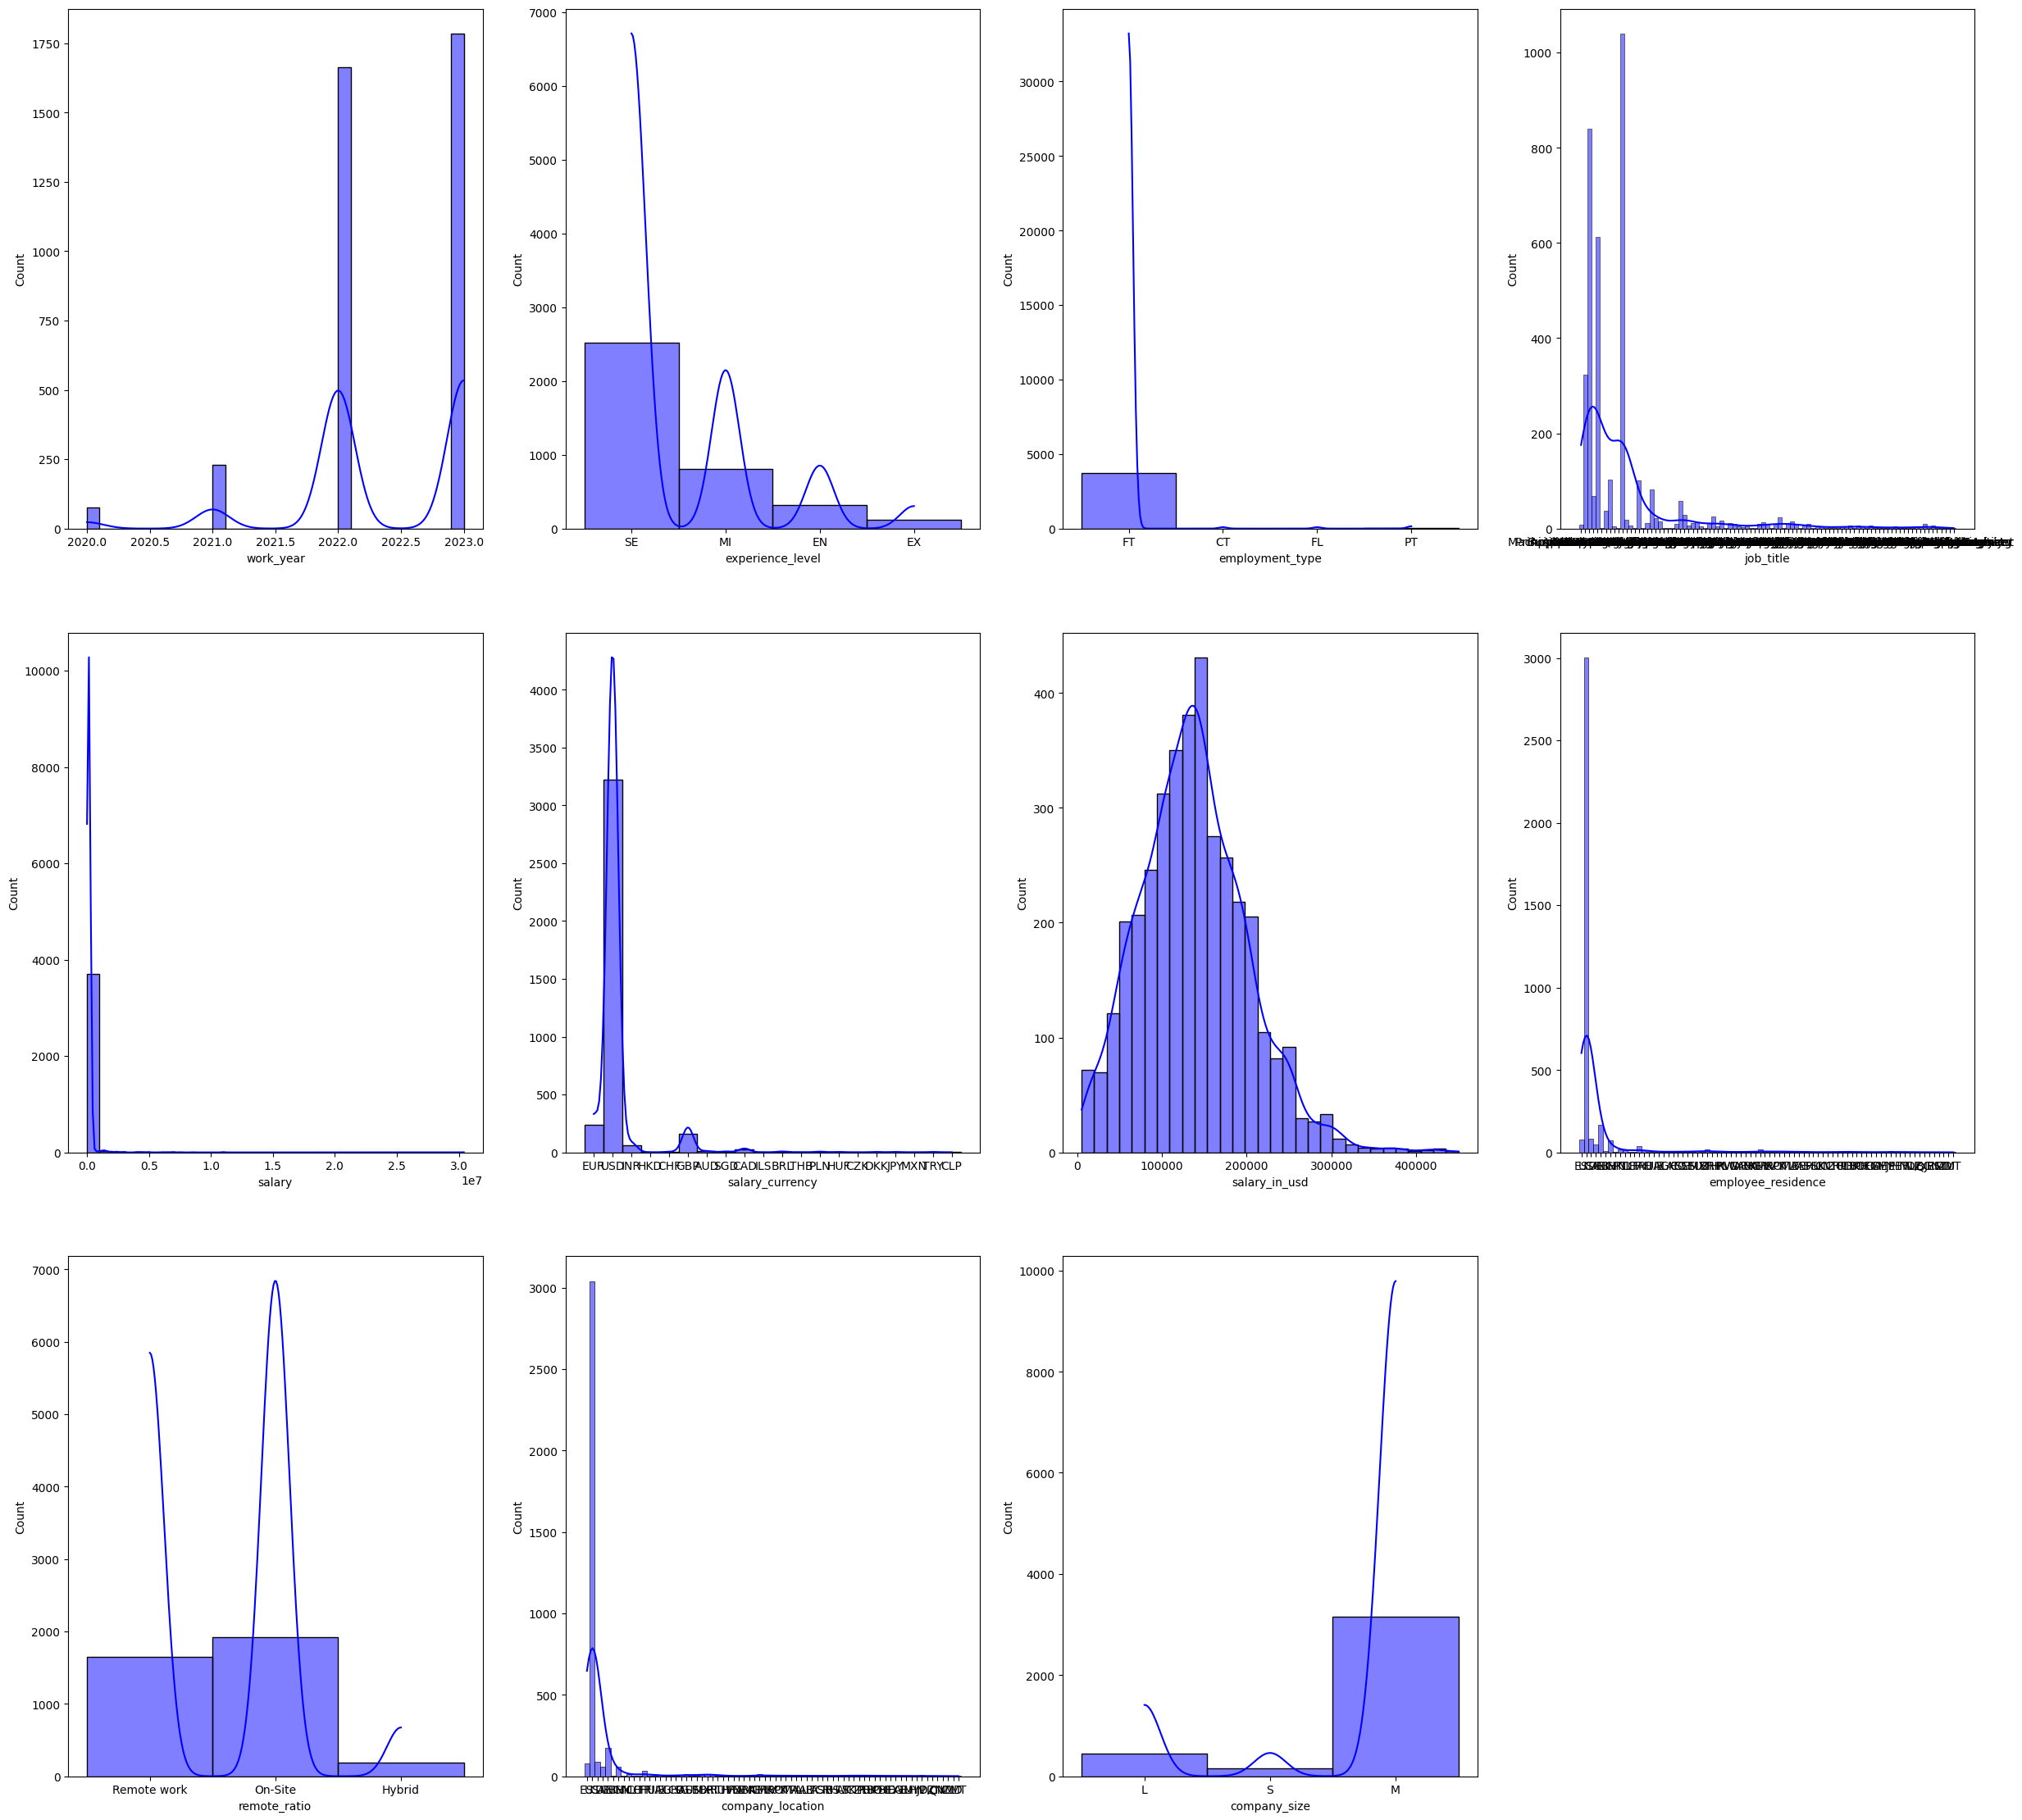

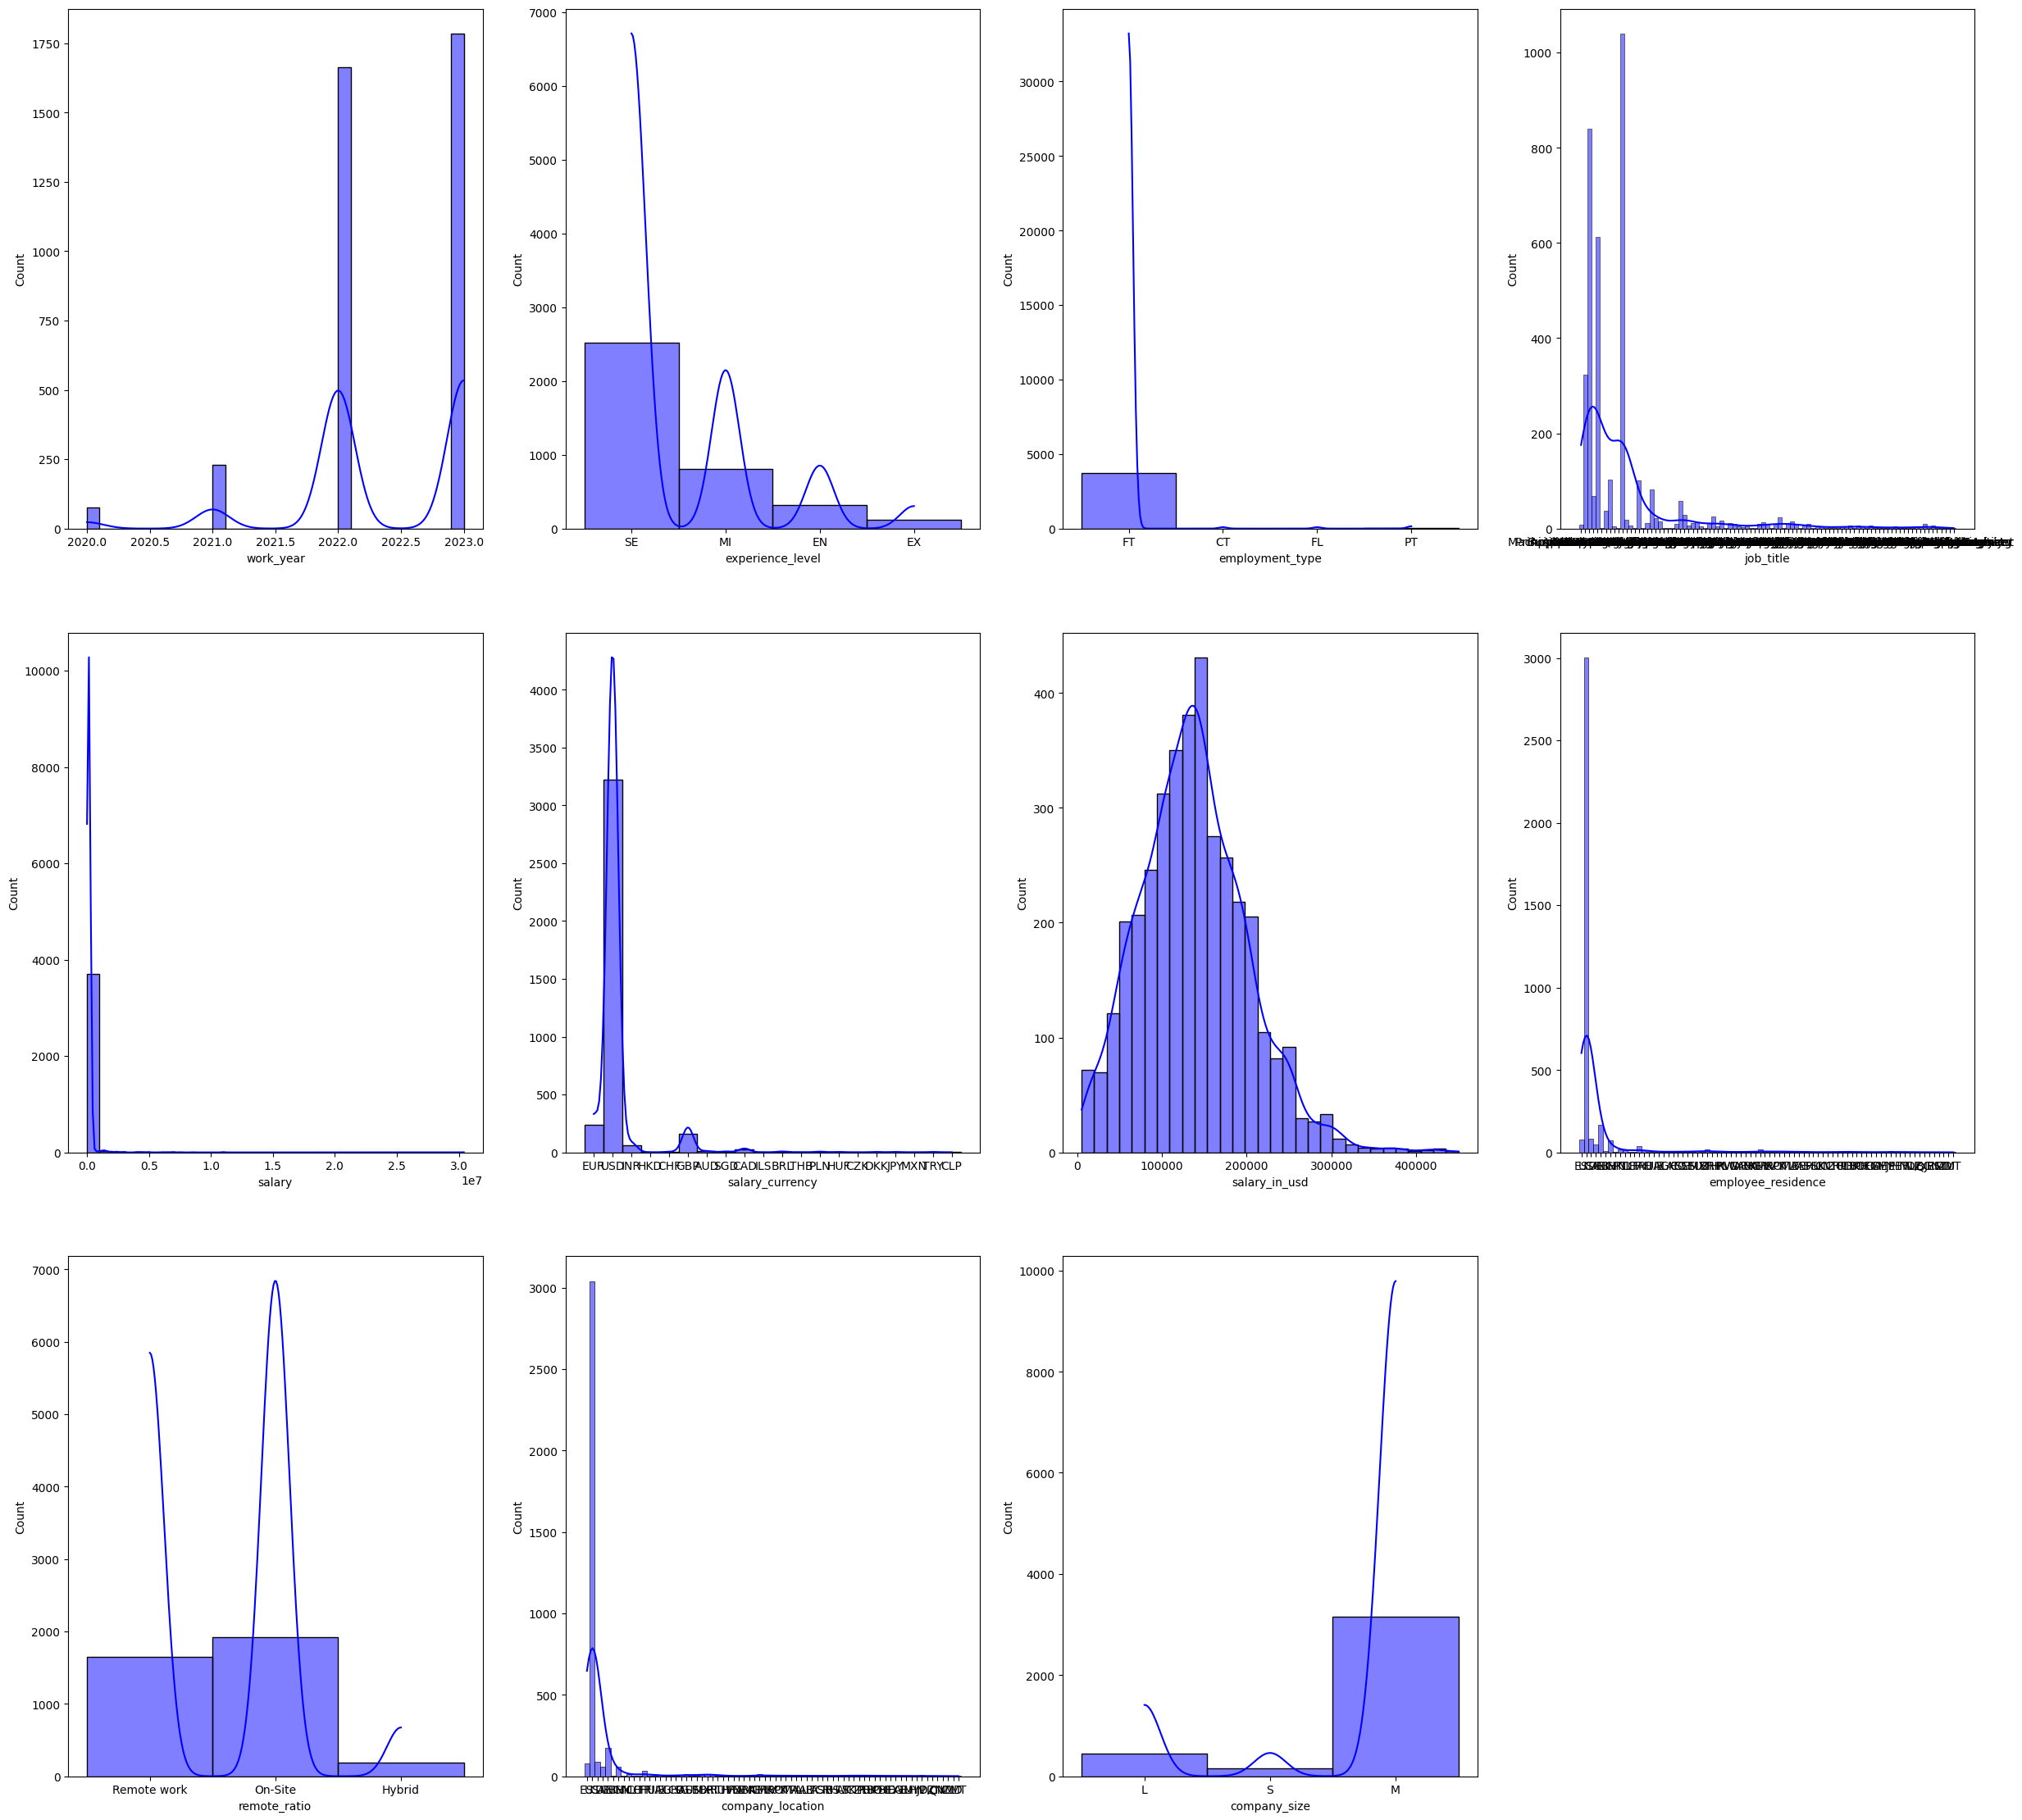

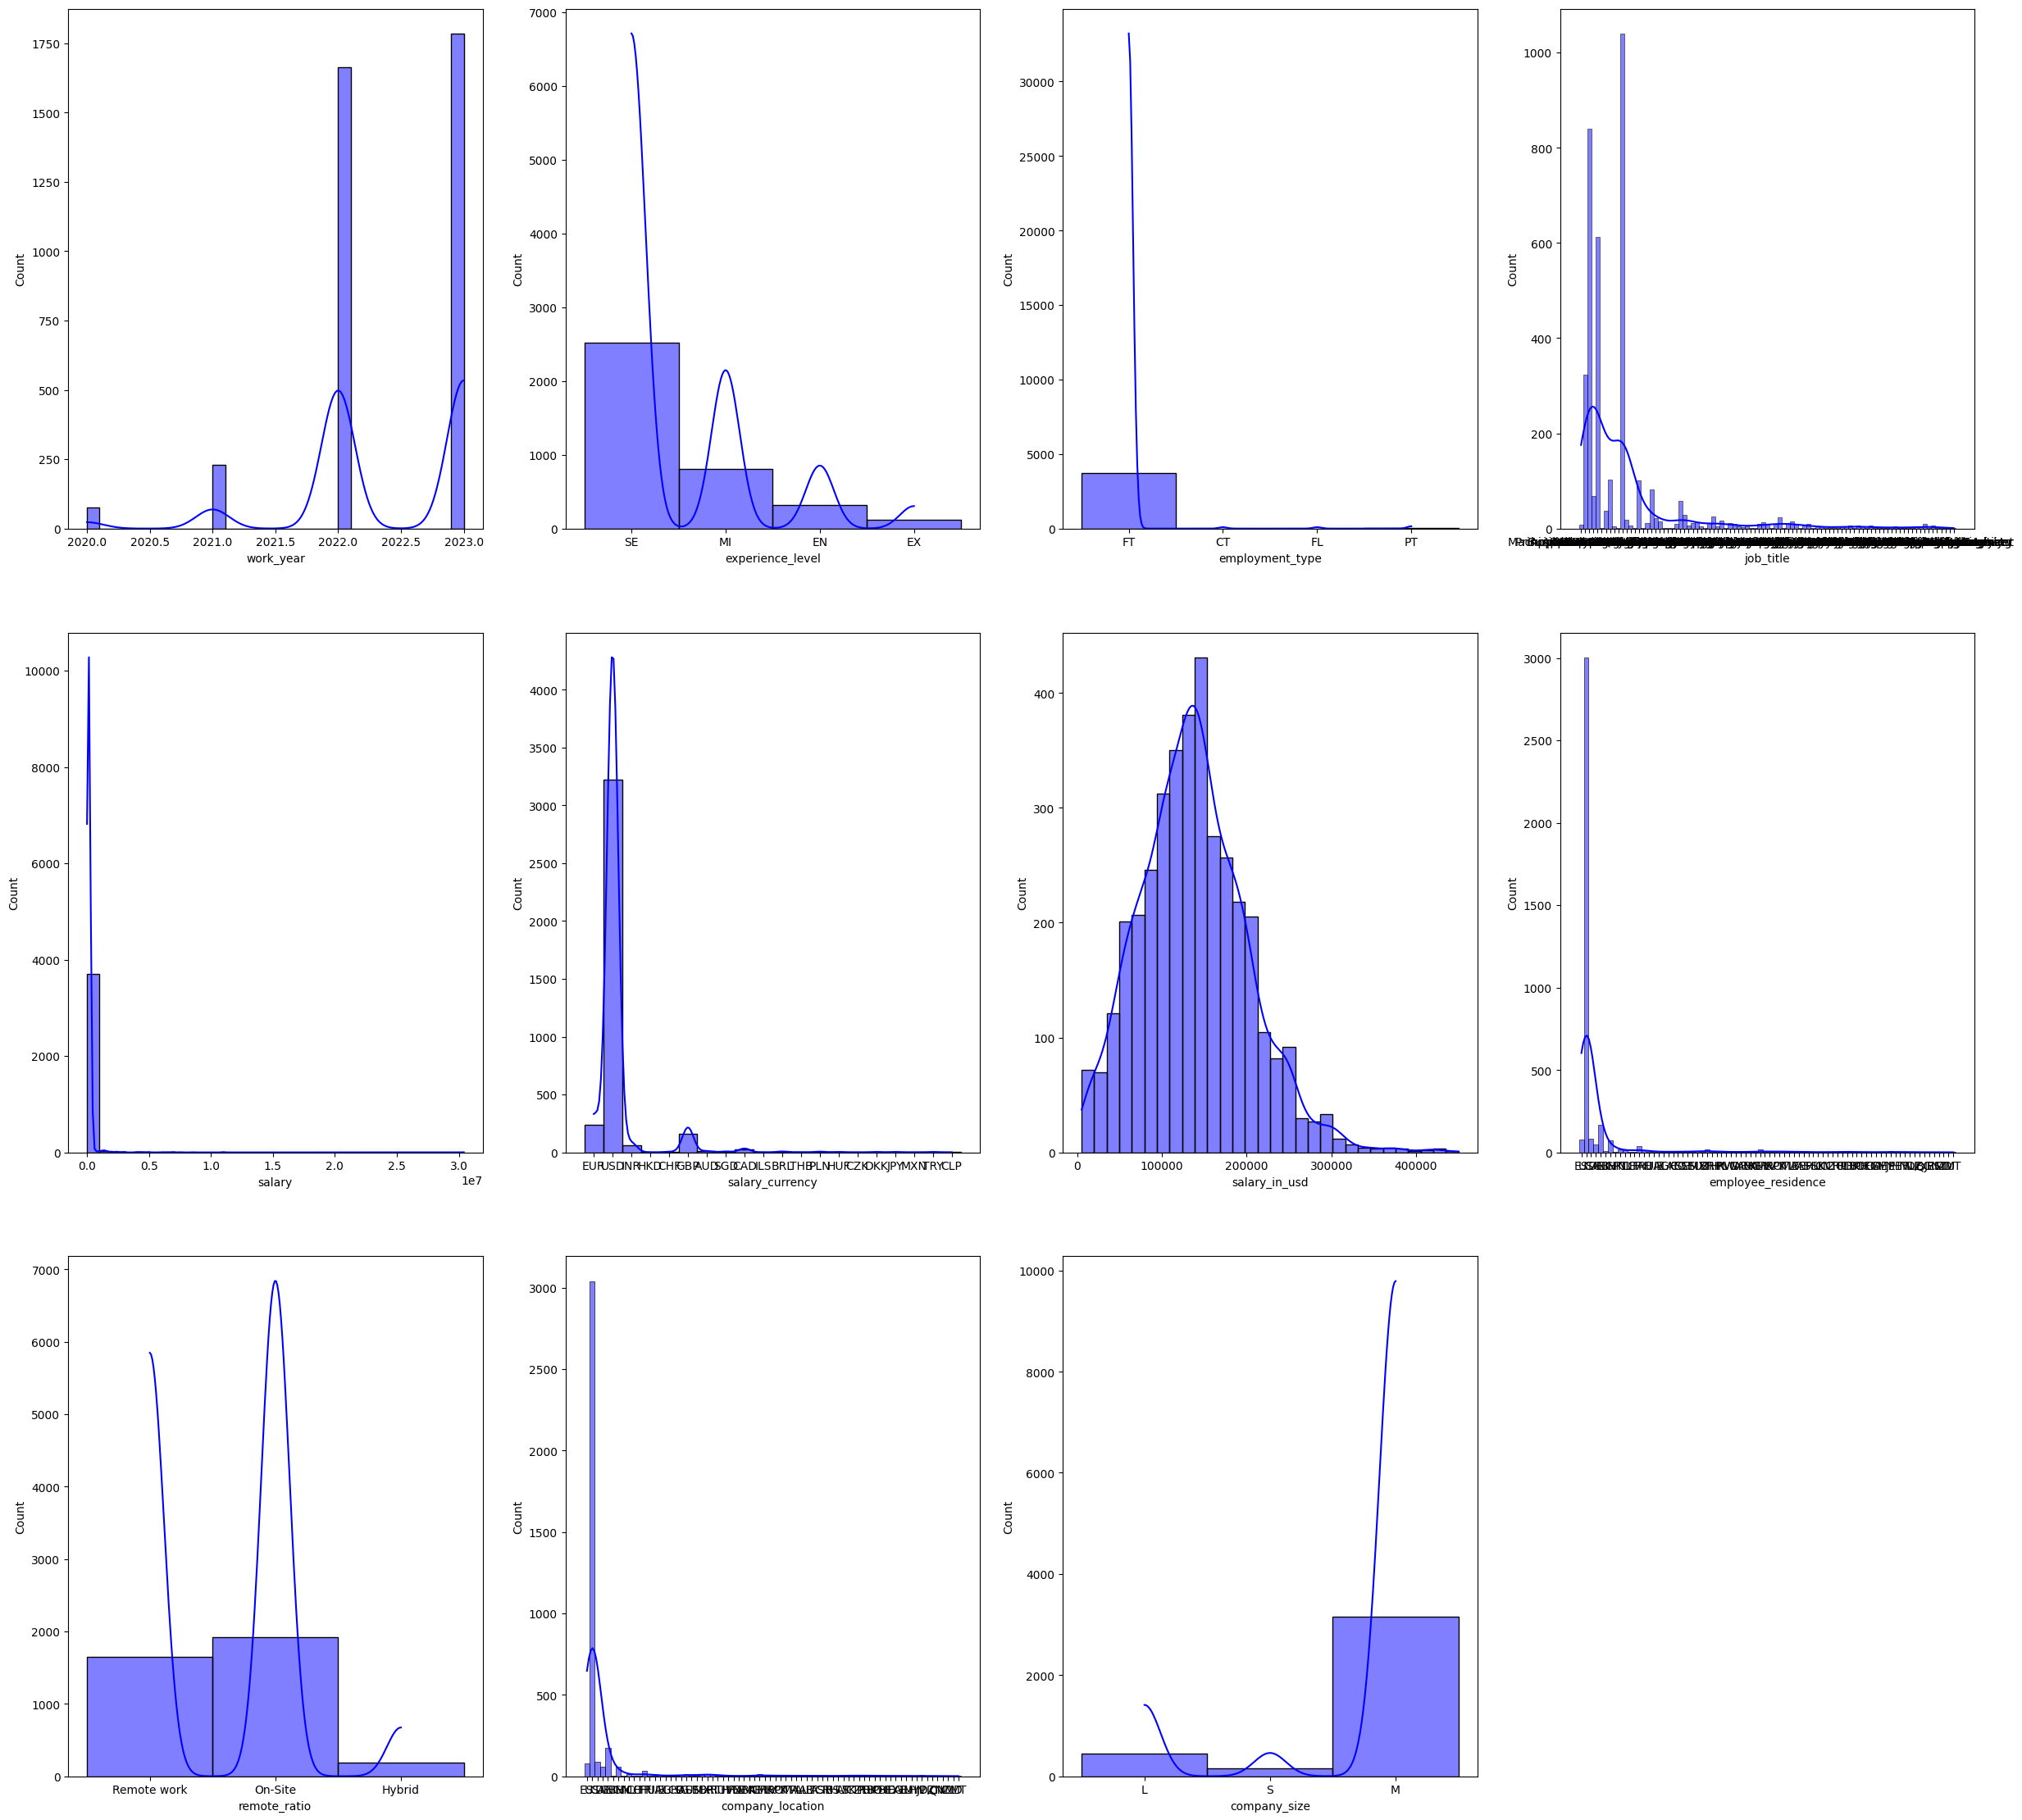

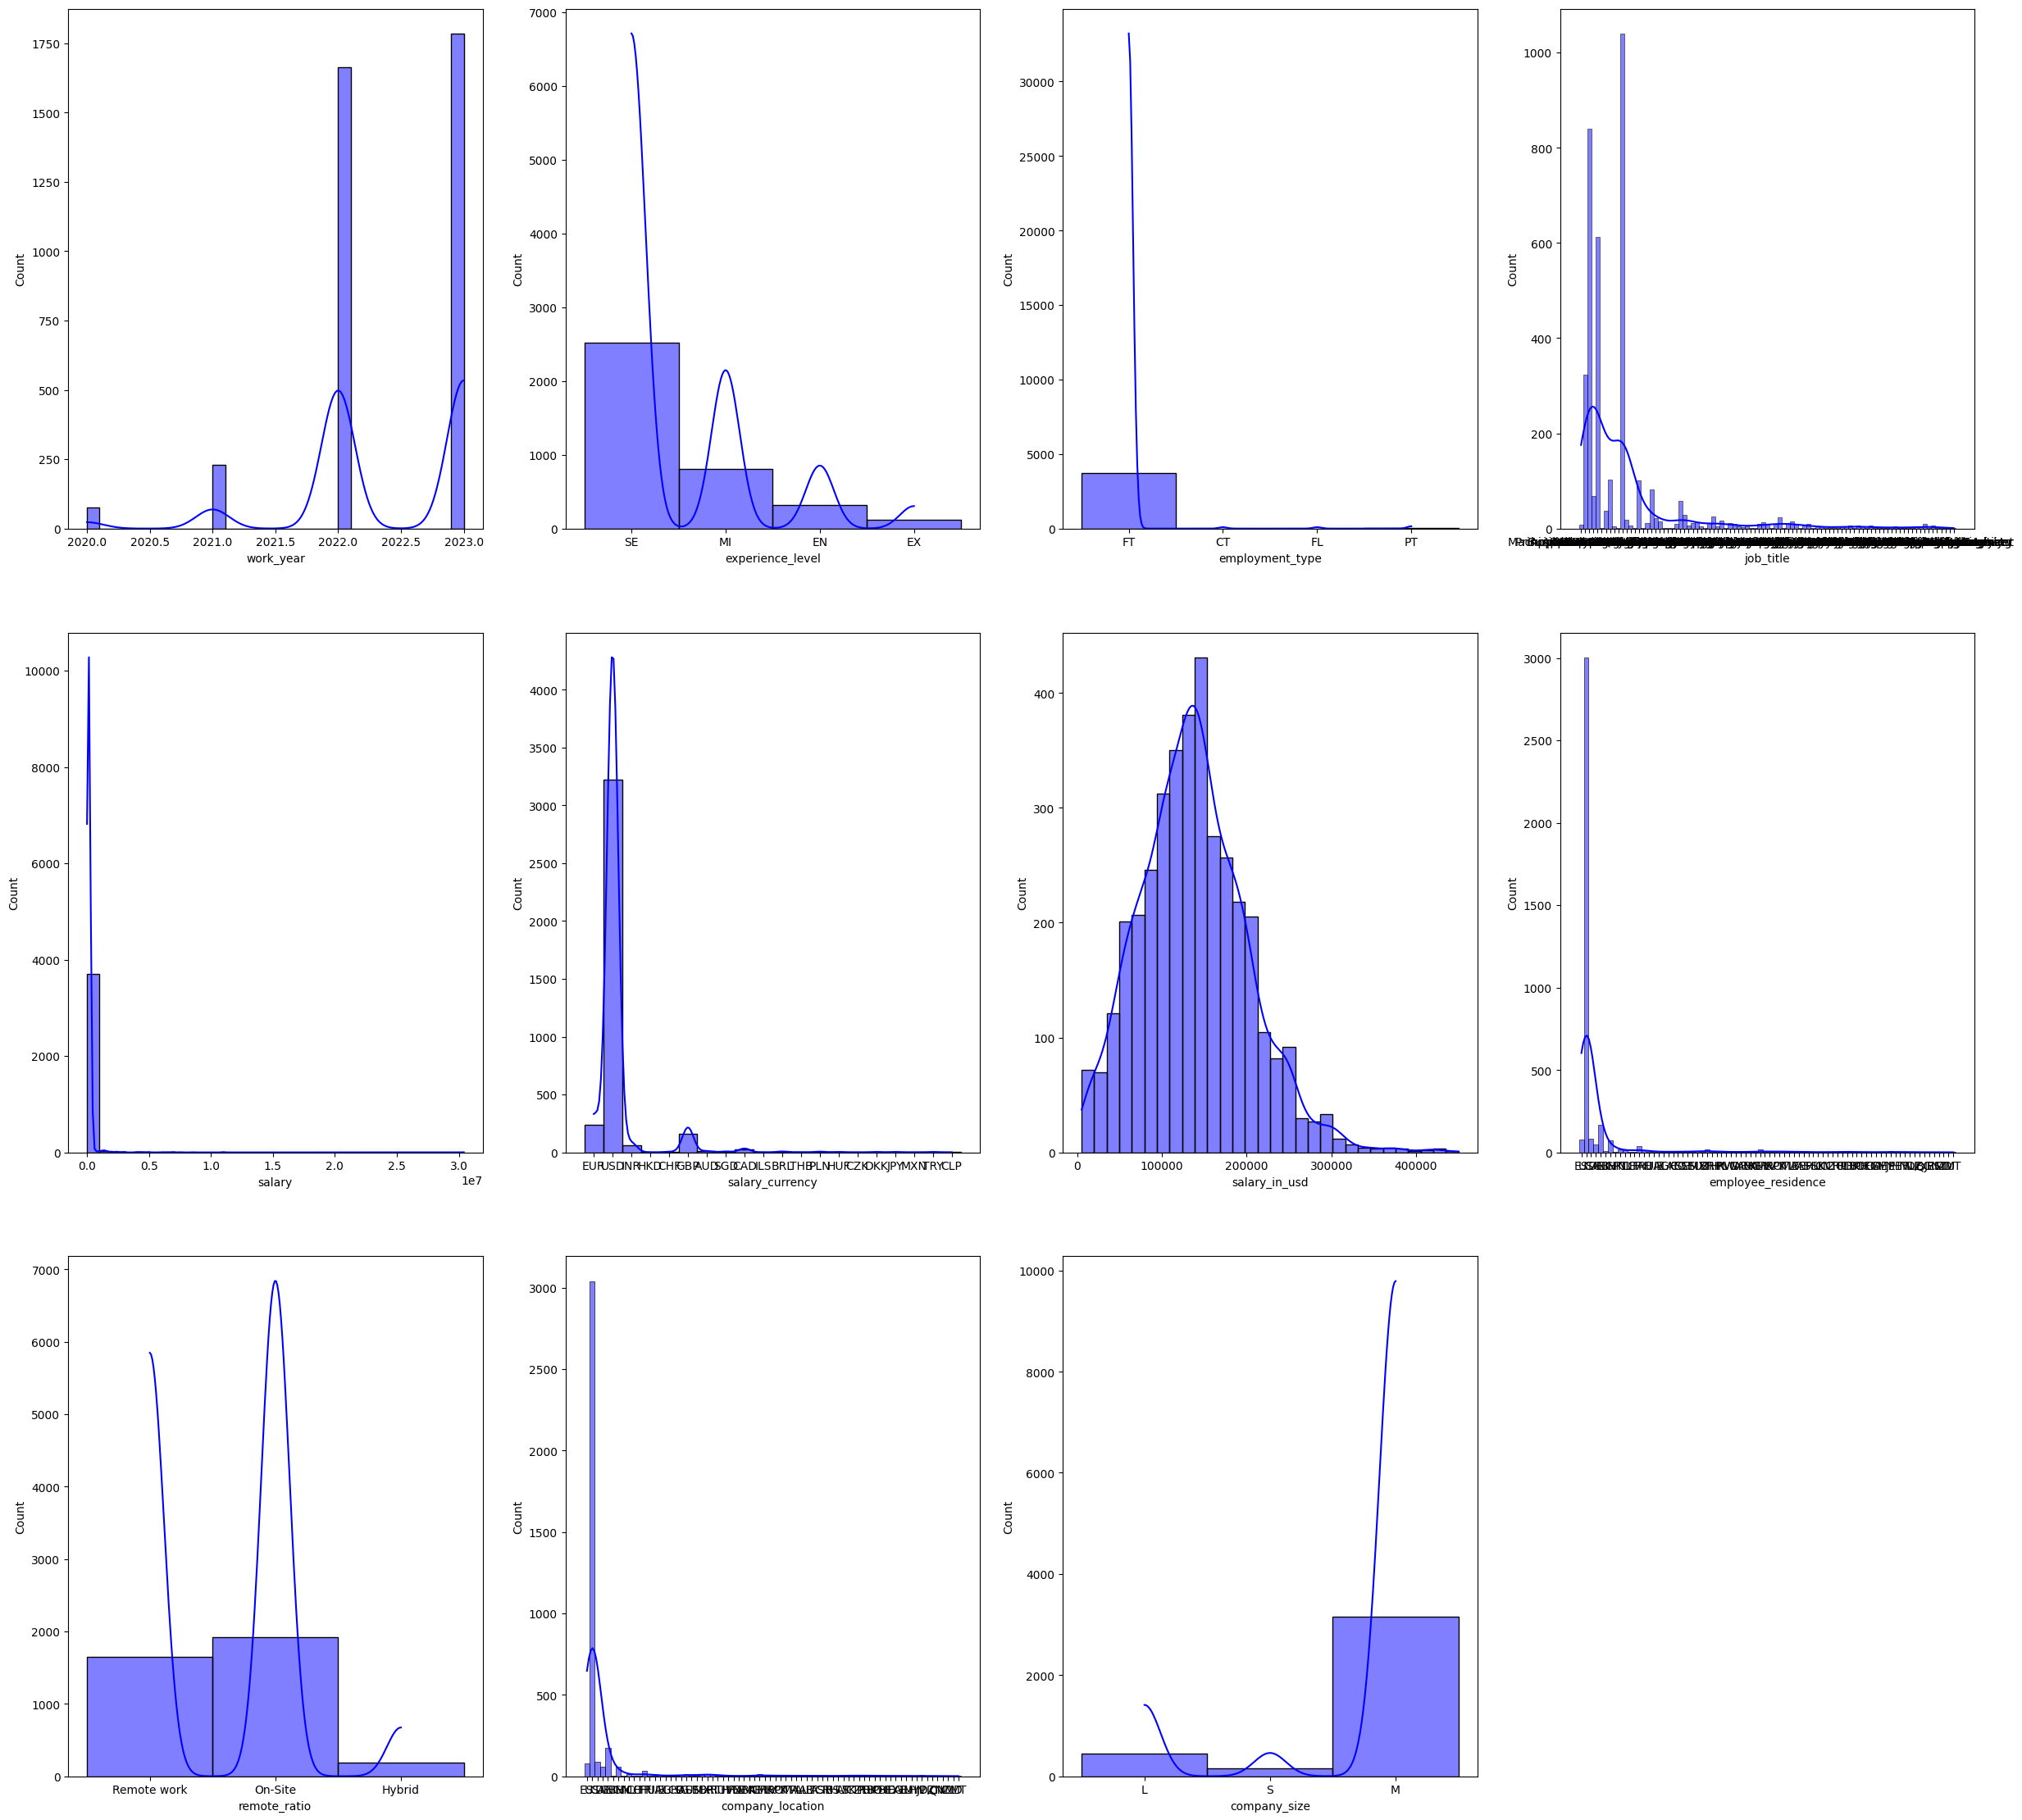

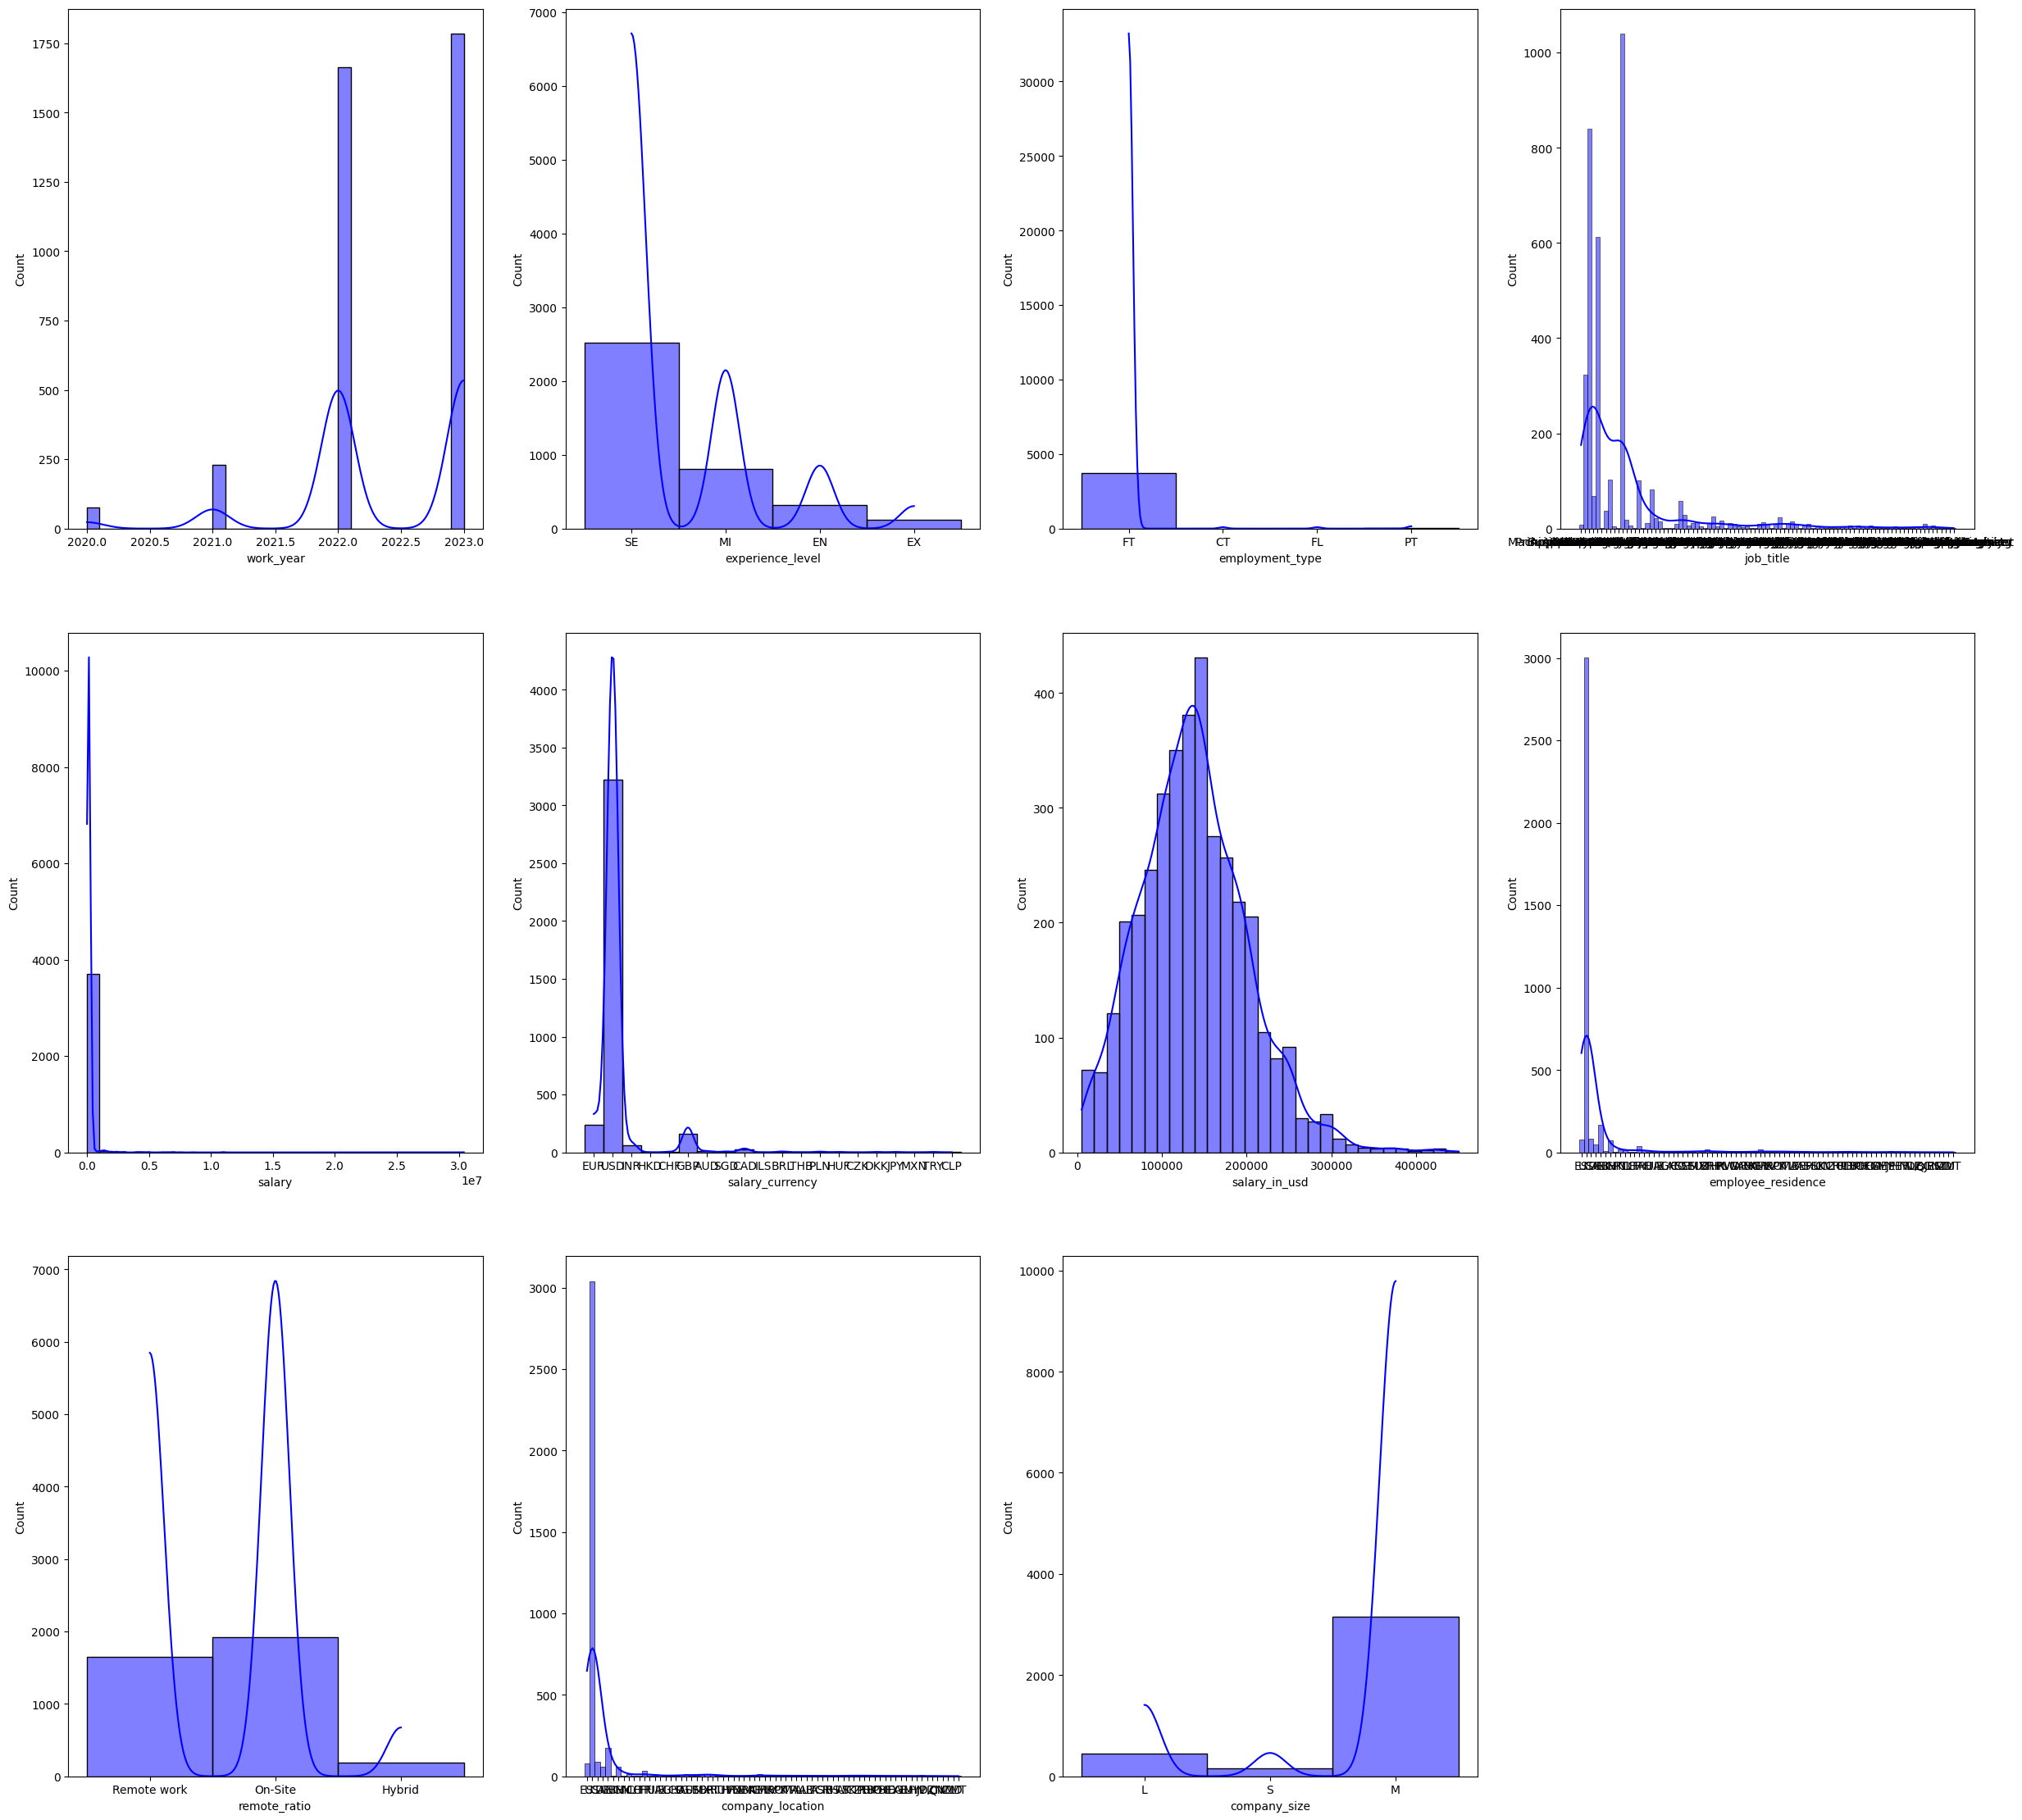

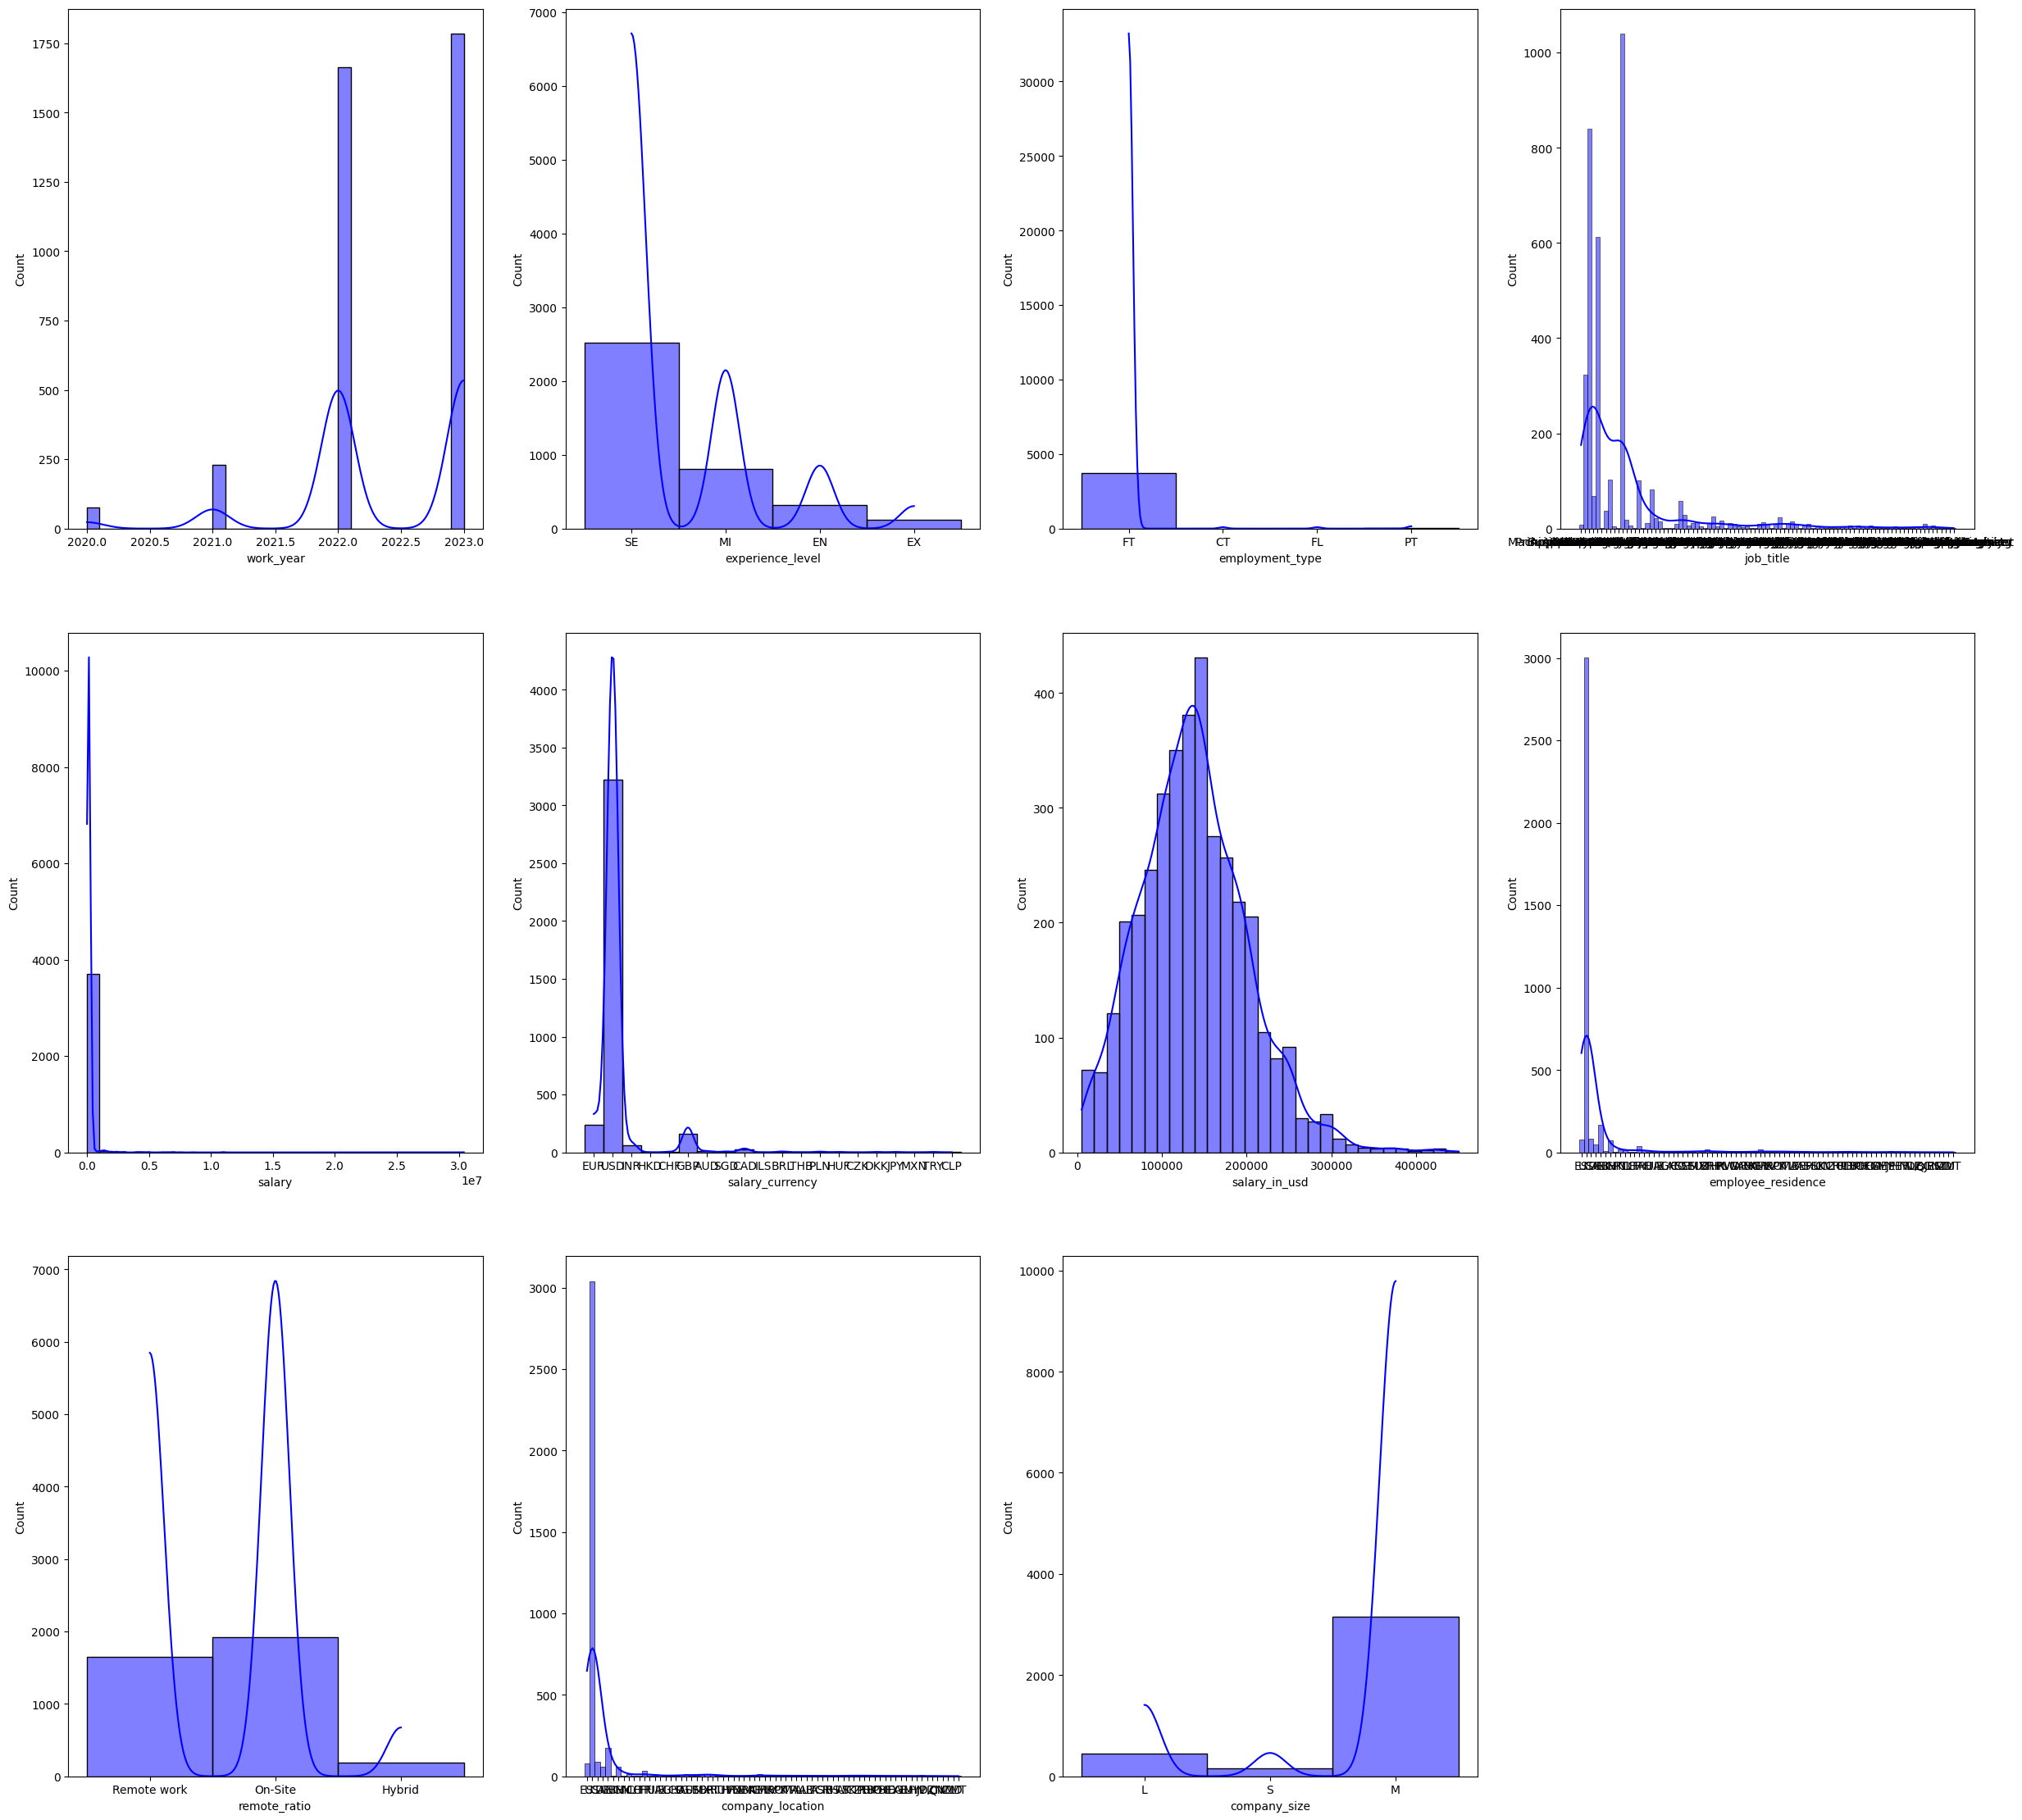

In [49]:
plt.figure(figsize=(30,28))

for i, col in enumerate(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']):
    plt.subplot(3,4, i+1)
    sns.histplot(data=data,
                 x=col,
                 kde=True,
                 bins=30,
                 color='blue')
    
    
plt.show()

<Axes: xlabel='job_title'>

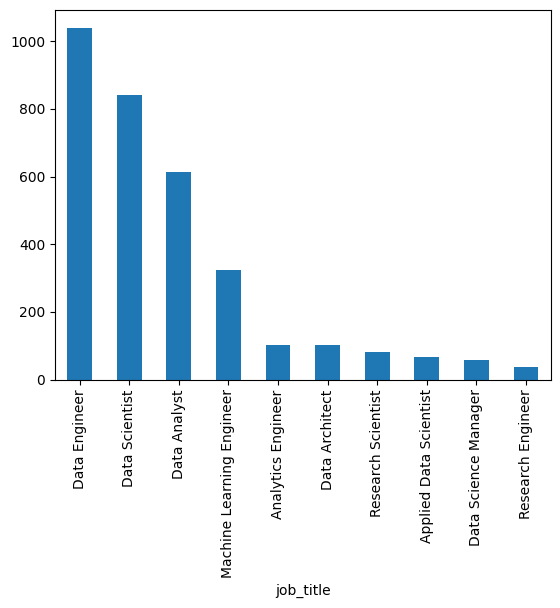

In [50]:
top_10_job= data.job_title.value_counts()[:10]
top_10_job.plot(kind='bar')


In [51]:
loc=data["company_location"]==data["employee_residence"]
loc.value_counts()

True     3659
False      96
Name: count, dtype: int64

<Axes: >

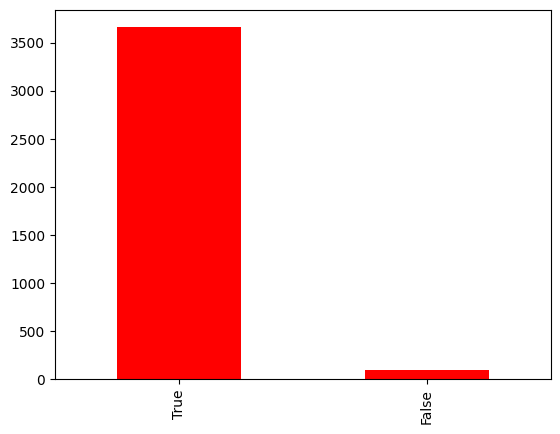

In [52]:
loc.value_counts().plot(kind='bar',color="red")

<Axes: xlabel='company_location'>

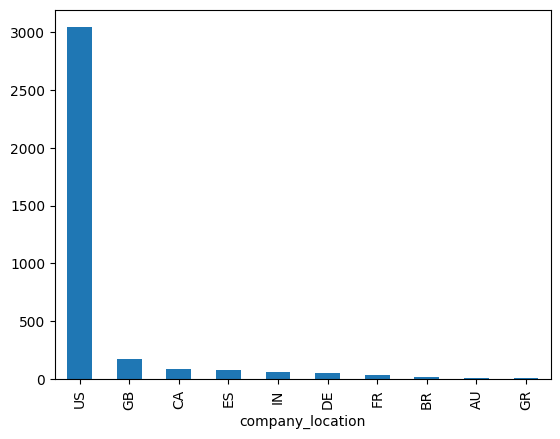

In [53]:
top_10_loc=data.company_location.value_counts()[:10]
top_10_loc.plot(kind='bar')

<Axes: xlabel='employee_residence'>

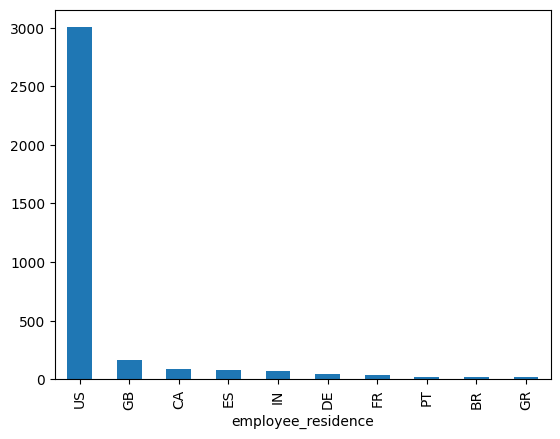

In [54]:
data.employee_residence.value_counts()[:10].plot(kind="bar")

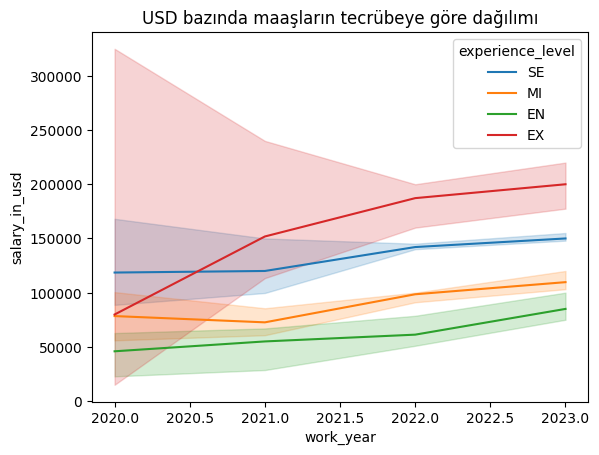

In [62]:
sns.lineplot(data=data, x="work_year", y="salary_in_usd", estimator=np.median,
             hue="experience_level")
plt.title("USD bazında maaşların tecrübeye göre dağılımı") 
plt.show()

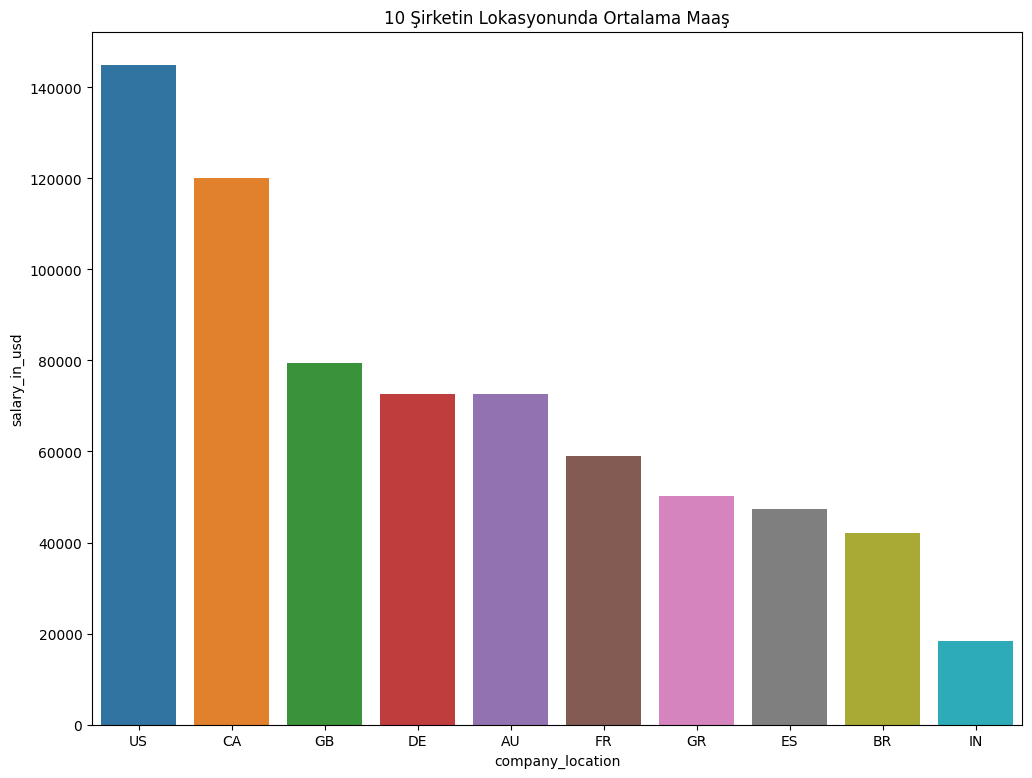

In [63]:
top_loc_salaries = data.groupby(data[data.company_location.isin(top_10_loc.index.to_list())].company_location)\
["salary_in_usd"].median()\
.sort_values(ascending=False)\
.reset_index() 

plt.figure(figsize=(12,9))
sns.barplot(data=top_loc_salaries, x=top_loc_salaries.company_location, y=top_loc_salaries.salary_in_usd)
plt.title("10 Şirketin Lokasyonunda Ortalama Maaş")

plt.show()

TypeError: 'str' object is not callable

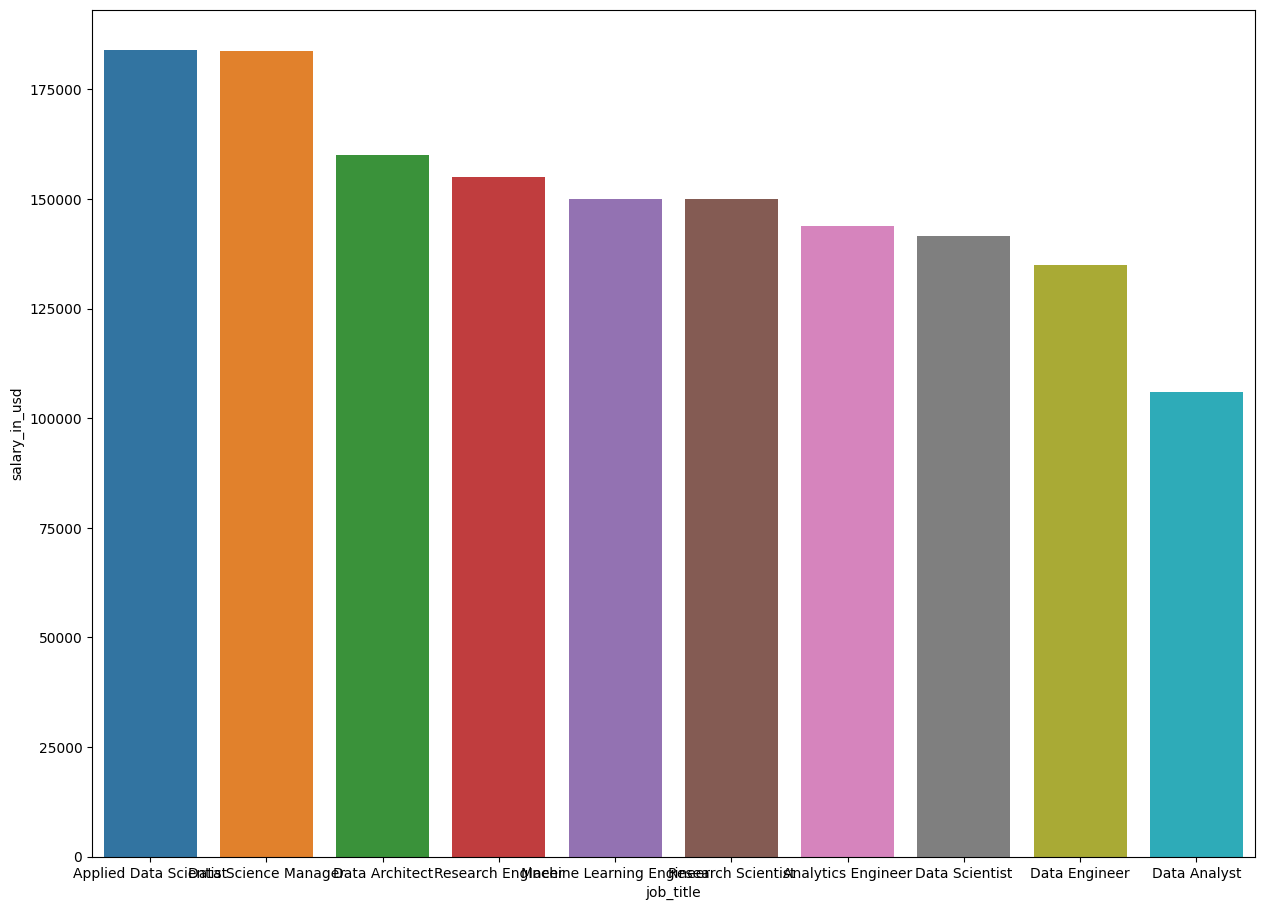

In [72]:
top_common_salaries = data.groupby(data[data.job_title.isin(top_10_job.index.to_list())].job_title)["salary_in_usd"]\
.median()\
.sort_values(ascending=False)\
.reset_index()

plt.figure(figsize=(15,11))
sns.barplot(data=top_common_salaries, x=top_common_salaries.job_title, y=top_common_salaries.salary_in_usd)
plt.xlabel(rotation='vertical')
plt.title("En yaygın 10 iş için ortalama maaş")

plt.show()

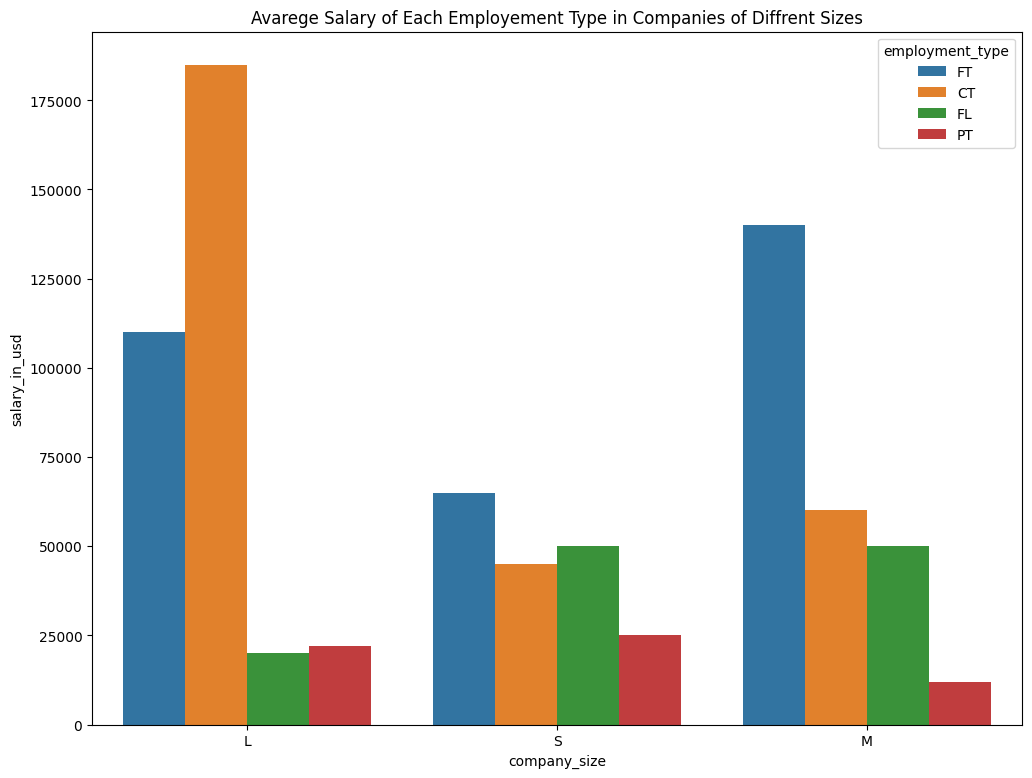

In [74]:
plt.figure(figsize=(12,9))
sns.barplot(data=data, x="company_size", y="salary_in_usd", hue="employment_type", estimator=np.median, errorbar=None)
plt.title("Avarege Salary of Each Employement Type in Companies of Diffrent Sizes")
plt.show()

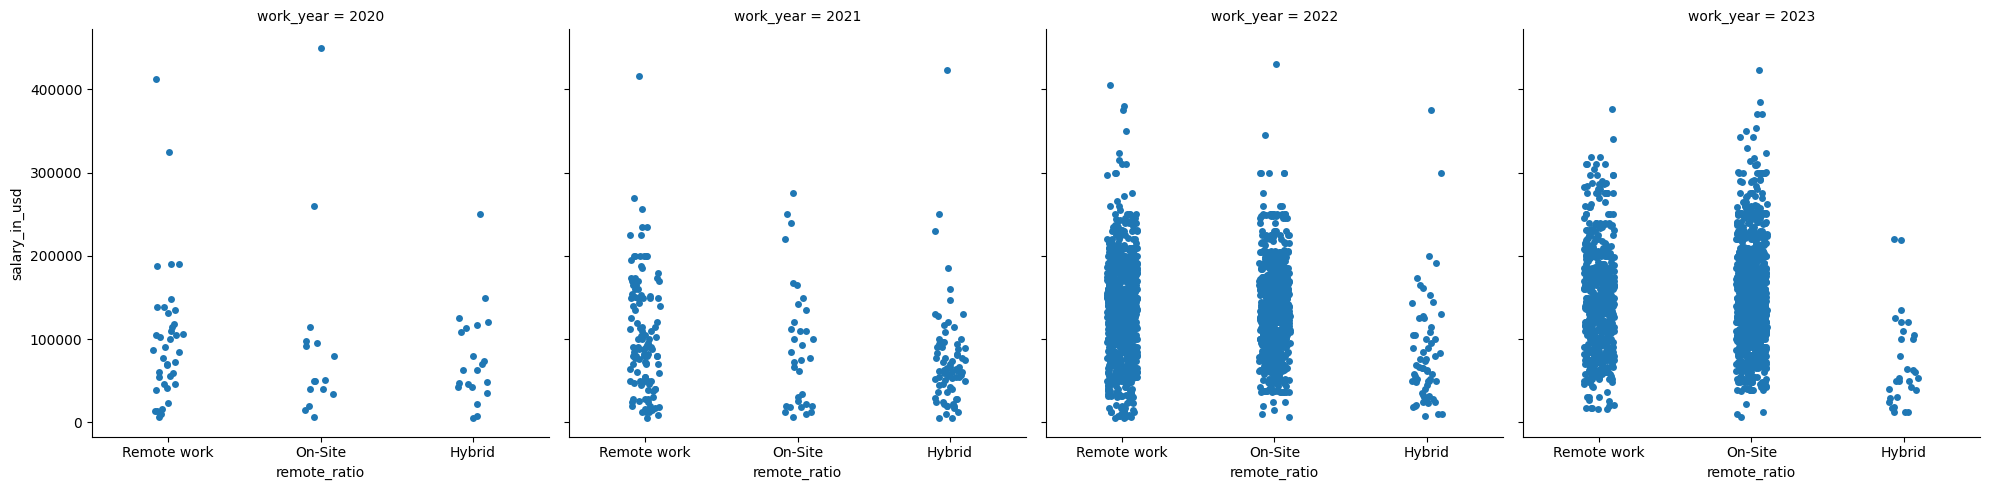

In [75]:
sns.catplot(data=data, x="remote_ratio", y="salary_in_usd", col="work_year", estimator=np.median)
plt.show()

Text(0.5, 1.0, 'Confusssion Matrix')

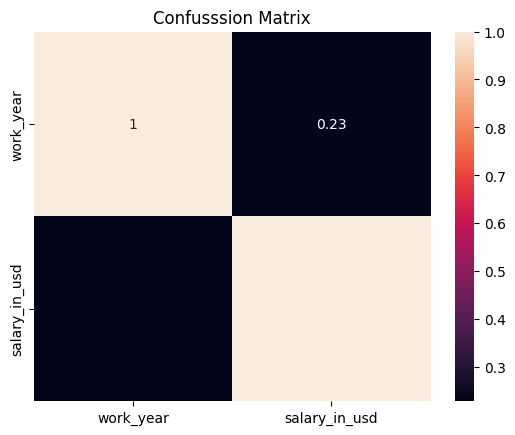

In [91]:
sns.heatmap(data[["work_year","salary_in_usd"]].corr(), annot=True)
plt.title("Confusssion Matrix")